<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/MLR_Toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
df1 = df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
df1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
df1.rename(columns={'Age_08_04':'Age', 'Quarterly_Tax':'QTax'}, inplace=True)
df1

<ipython-input-8-c536c5b954f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Age_08_04':'Age', 'Quarterly_Tax':'QTax'}, inplace=True)


,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


<ipython-input-9-8916a5bd0bbe>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(331)


Text(0.5, 1.0, 'Weight')

<Figure size 2000x1200 with 0 Axes>

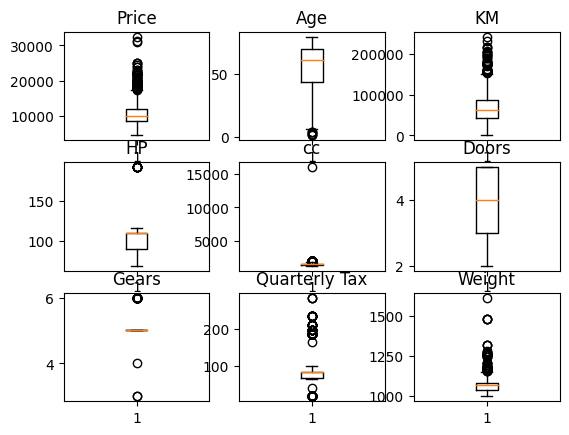

In [9]:
plt.figure(figsize=(20, 12))
plt.subplots()
plt.subplot(331)
plt.boxplot(df1['Price'])
plt.title('Price')
plt.subplot(332)
plt.boxplot(df1['Age'])
plt.title("Age")
plt.subplot(333)
plt.boxplot(df1['KM'])
plt.title("KM")
plt.subplot(334)
plt.boxplot(df1['HP'])
plt.title("HP")
plt.subplot(335)
plt.boxplot(df1['cc'])
plt.title("cc")
plt.subplot(336)
plt.boxplot(df1['Doors'])
plt.title("Doors")
plt.subplot(337)
plt.boxplot(df1['Gears'])
plt.title("Gears")
plt.subplot(338)
plt.boxplot(df1['QTax'])
plt.title("Quarterly Tax")
plt.subplot(339)
plt.boxplot(df1['Weight'])
plt.title("Weight")

In [10]:
zero_values = df1[df1==0]
print(zero_values)

      Price  Age  KM  HP  cc  Doors  Gears  QTax  Weight
0       NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
1       NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
2       NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
3       NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
4       NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
...     ...  ...  ..  ..  ..    ...    ...   ...     ...
1431    NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
1432    NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
1433    NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
1434    NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN
1435    NaN  NaN NaN NaN NaN    NaN    NaN   NaN     NaN

[1436 rows x 9 columns]


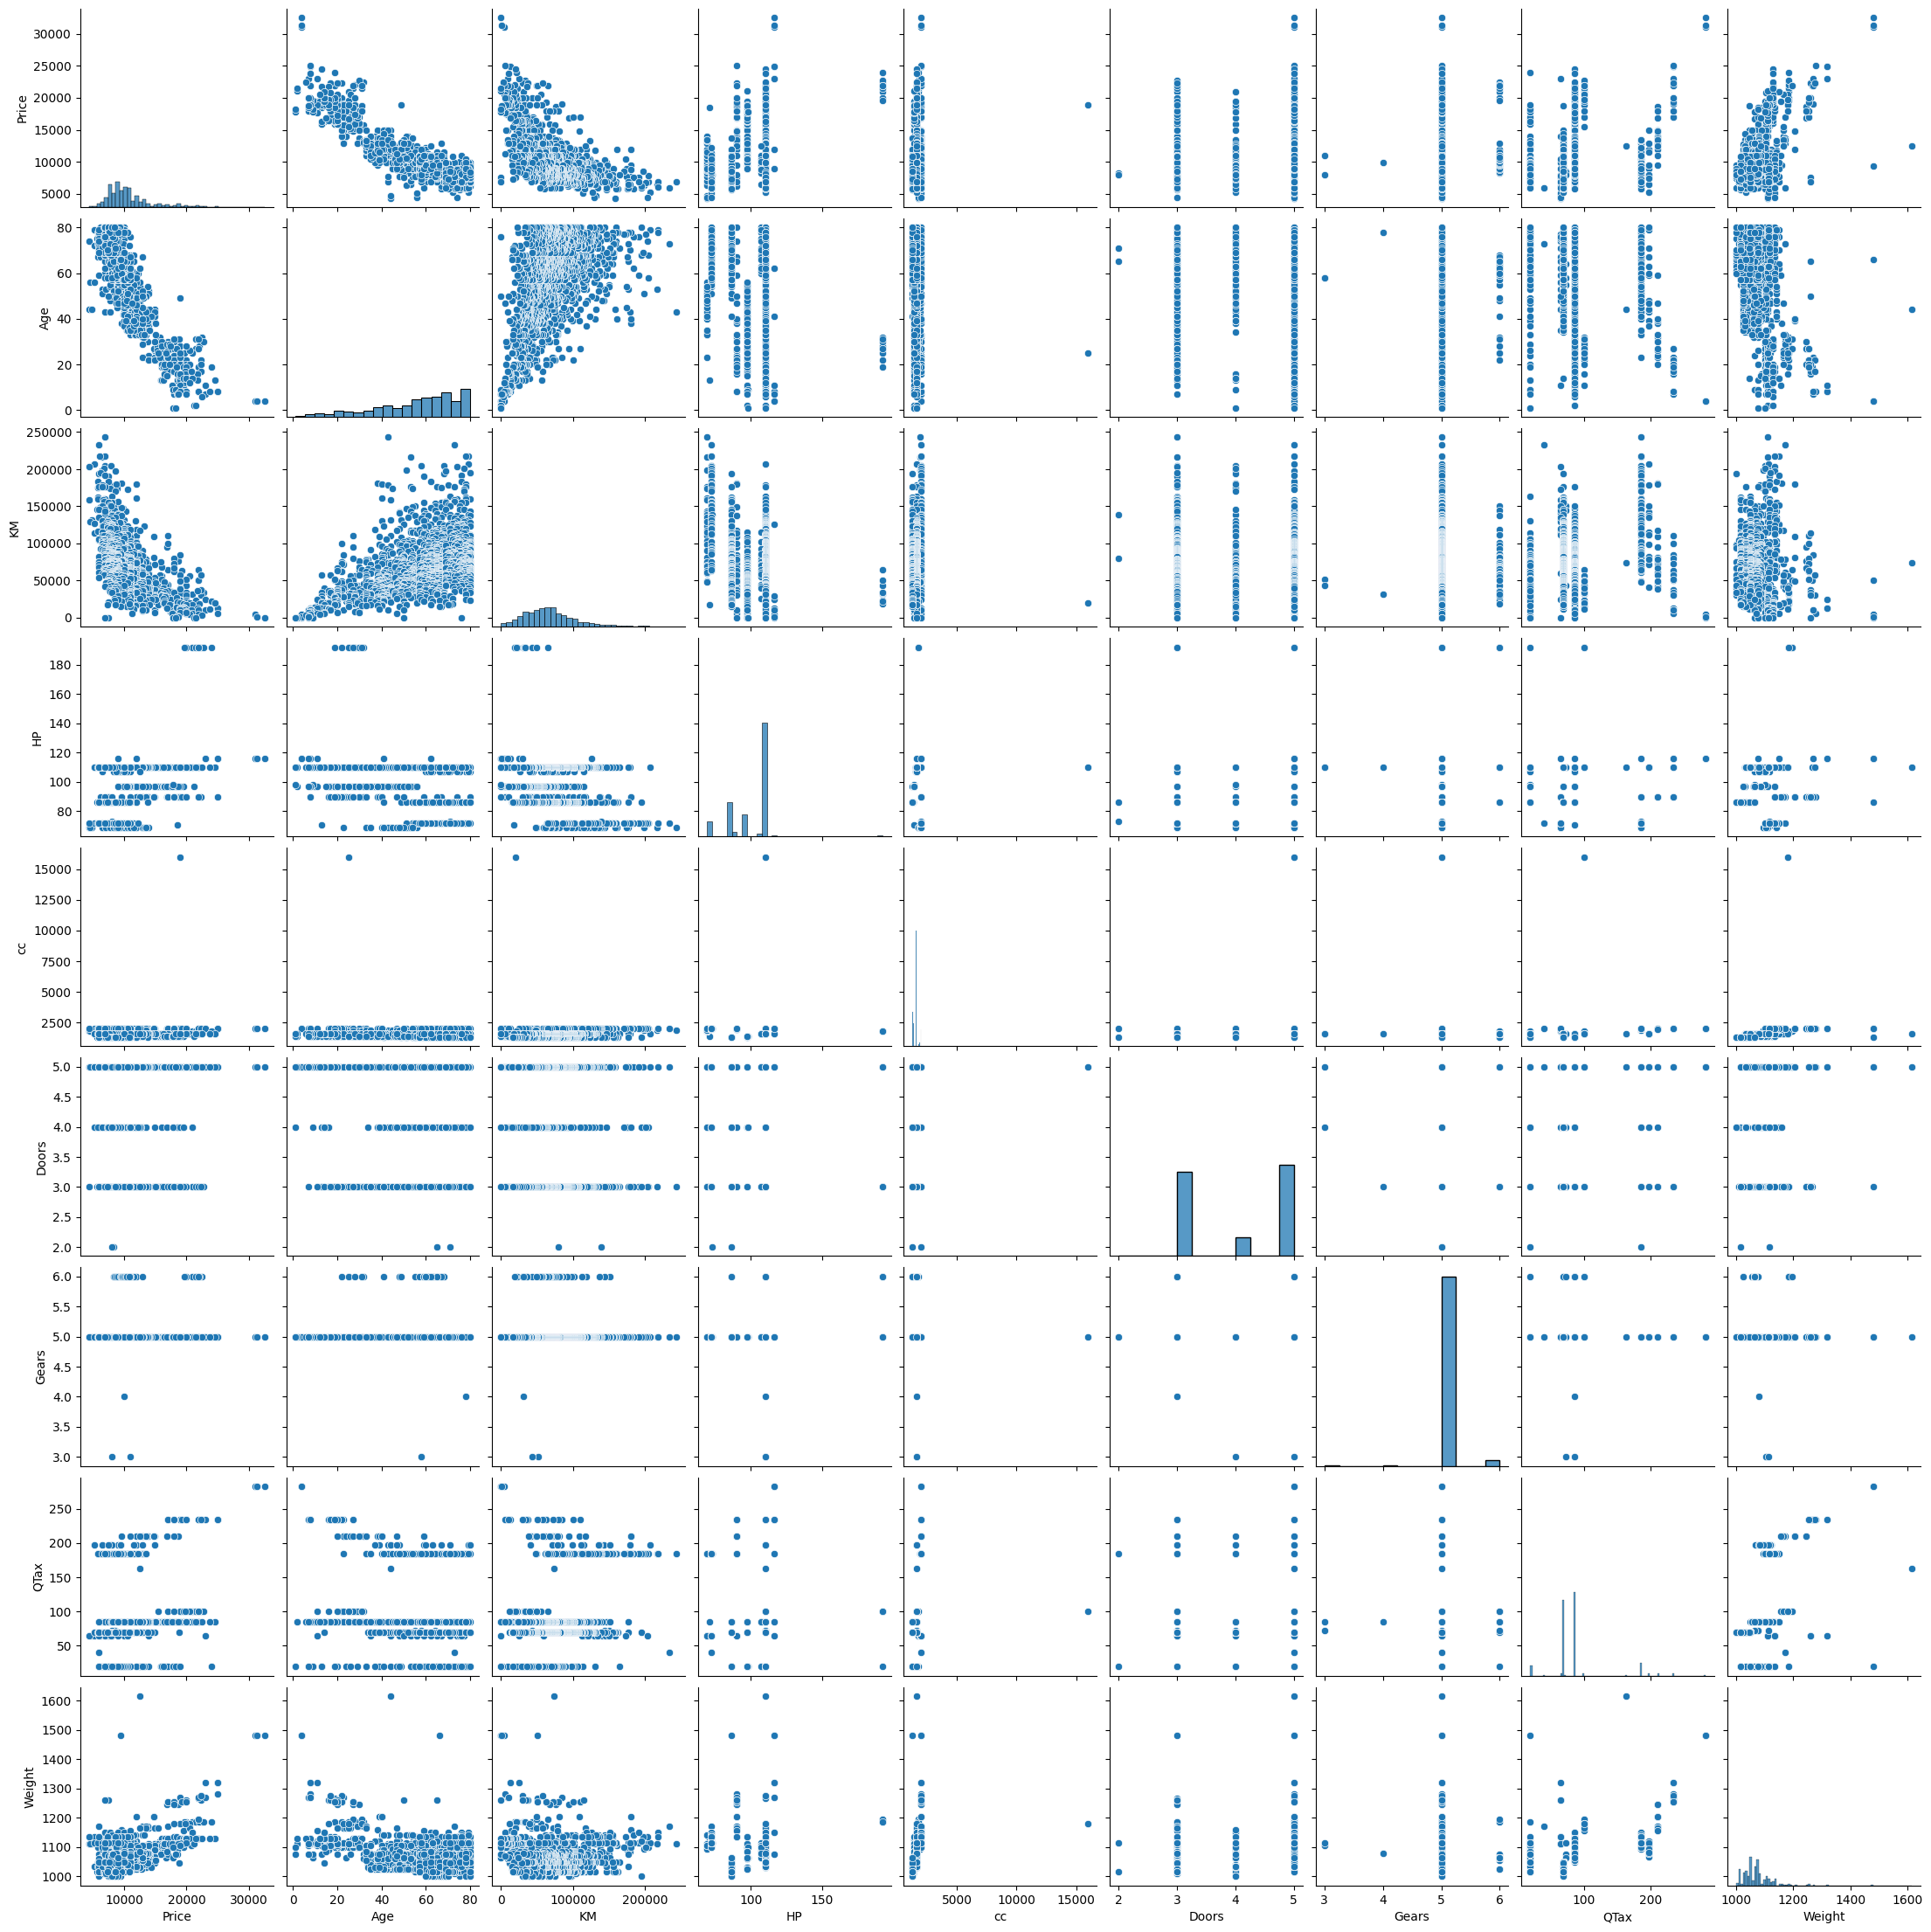

In [11]:
sns.pairplot(df1)

In [12]:
corr = df1.corr()
corr

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QTax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Axes: >

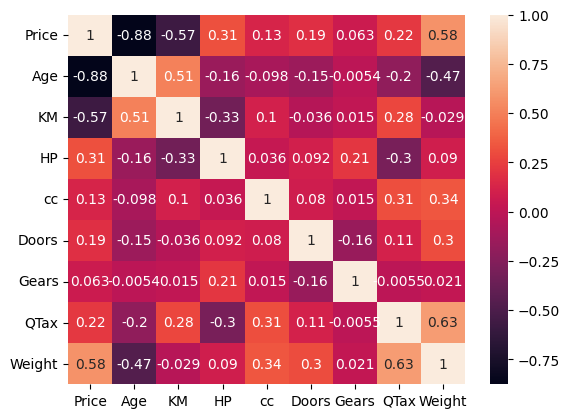

In [13]:
sns.heatmap(corr, annot=True)

In [14]:
model = smf.ols('Price ~ Age+KM+HP+cc+Doors+Gears+QTax+Weight', data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:56:15   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QTax           3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
modelcc = smf.ols('Price ~ cc', data = df1).fit()
modelcc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.55e-06
Time:                        11:56:15   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
modeldoors = smf.ols('Price ~ Doors', data = df1).fit()
modeldoors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.46e-12
Time:                        11:56:15   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
modelccdoors = smf.ols('Price ~ cc+Doors', data = df1).fit()
modelccdoors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.15e-15
Time:                        11:56:15   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
modelweight = smf.ols('Price ~ Weight', data = df1).fit()
modelweight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.63e-130
Time:                        11:56:15   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
modelgears = smf.ols('Price ~ Gears', data = df1).fit()
modelgears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Thu, 02 May 2024   Prob (F-statistic):             0.0168
Time:                        11:56:15   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
modelage = smf.ols('Price ~ Age', data = df1).fit()
modelage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:56:15   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
modelKM = smf.ols('Price ~ KM', data = df1).fit()
modelKM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.76e-124
Time:                        11:56:16   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
modelHP = smf.ols('Price ~ HP', data = df1).fit()
modelHP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.93e-34
Time:                        11:56:16   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
modelQTax = smf.ols('Price ~ QTax', data = df1).fit()
modelQTax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.41e-17
Time:                        11:56:16   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9046.7382    218.889     41.330      0.000    8617.362    9476.115
QTax          19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+QTax+Weight', data=df1).fit().rsquared
vif_age = 1/(1-rsq_age)
rsq_km = smf.ols('KM~Age+HP+cc+Doors+Gears+QTax+Weight',data=df1).fit().rsquared
vif_km = 1/(1-rsq_km)
rsq_hp = smf.ols('HP~KM+Age+cc+Doors+Gears+QTax+Weight', data=df1).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_cc = smf.ols('cc~Age+HP+KM+Doors+Gears+QTax+Weight',data=df1).fit().rsquared
vif_cc = 1/(1-rsq_cc)
rsq_doors = smf.ols('Doors~KM+HP+cc+Age+Gears+QTax+Weight', data=df1).fit().rsquared
vif_doors = 1/(1-rsq_doors)
rsq_gears = smf.ols('Gears~Age+HP+cc+Doors+KM+QTax+Weight',data=df1).fit().rsquared
vif_gears = 1/(1-rsq_gears)
rsq_qtax = smf.ols('QTax~KM+HP+cc+Doors+Gears+Age+Weight', data=df1).fit().rsquared
vif_qtax = 1/(1-rsq_qtax)
rsq_weight = smf.ols('Weight~Age+HP+cc+Doors+Gears+QTax+KM',data=df1).fit().rsquared
vif_weight = 1/(1-rsq_weight)

d1 = {'Variables': ['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QTax',
       'Weight'],'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_qtax, vif_weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QTax,2.311431
7,Weight,2.516420


In [25]:
table1 = {'Variables': ['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
         'R-squared':[modelage.rsquared, modelKM.rsquared, modelHP.rsquared, modelcc.rsquared, modeldoors.rsquared, modelgears.rsquared, modelQTax.rsquared, modelweight.rsquared],
         'Rsquared_adj': [modelage.rsquared_adj, modelKM.rsquared_adj, modelHP.rsquared_adj, modelcc.rsquared_adj, modeldoors.rsquared_adj, modelgears.rsquared_adj, modelQTax.rsquared_adj, modelweight.rsquared_adj],
         'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_qtax, vif_weight]}
table = pd.DataFrame(table1)
table

,Variables,R-squared,Rsquared_adj,VIF
0,Age,0.768411,0.768249,1.884620
1,KM,0.324855,0.324384,1.756905
2,HP,0.099219,0.098590,1.419422
3,cc,0.015974,0.015288,1.163894
4,Doors,0.034346,0.033672,1.156575
5,Gears,0.003982,0.003288,1.098723
6,Quarterly_Tax,0.048047,0.047383,2.311431
7,Weight,0.337791,0.337329,2.516420


In [26]:
model1 = smf.ols('Price ~ Age+KM+HP+QTax+Weight', data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1797.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:56:16   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2554.4355   1048.246     -2.437      0.015   -4610.700    -498.171
Age         -121.8366      2.623    -46.454      0.000    -126.981    -116.692
KM            -0.0207      0.001    -16.543      0.000      -0.023      -0.018
HP            33.3411      2.731     12.209      0.000      27.984      38.698
QTax           3.9716      1.298      3.060      0.002       1.425       6.518
Weight        16.5860      1.022     16.224      0.000      14.581      18.591
==============================================================================
Omnibus:                      144.527   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.235
Skew:                          -0.209   Prob(JB):                    2.21e-198
Kurtosis:                       6.878   Cond. No.                     2.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

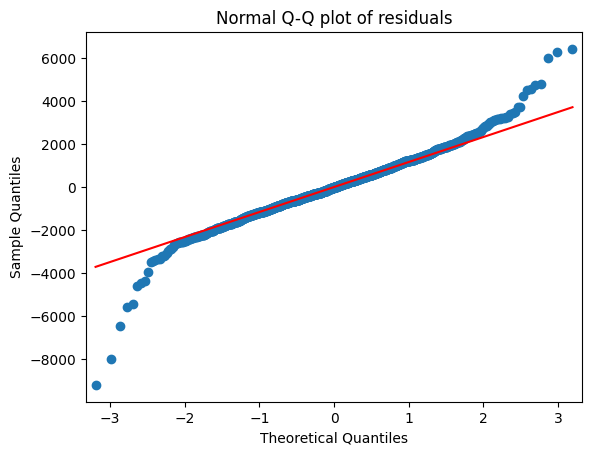

In [27]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [28]:
list(np.where(model1.resid>6000))

[array([109, 147, 523])]

In [29]:
def get_standardized_values( vals ):
  return ( vals - vals.mean())/vals.std()

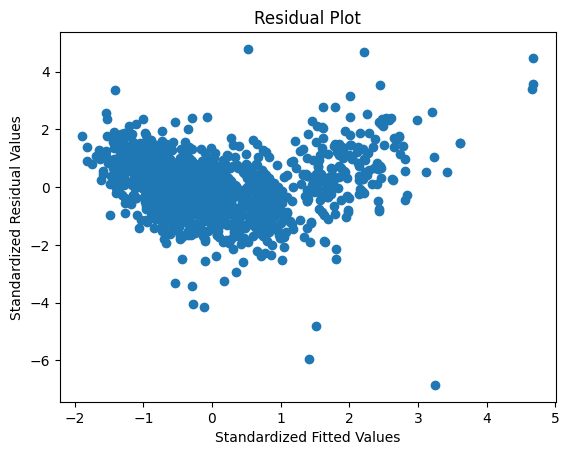

In [30]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

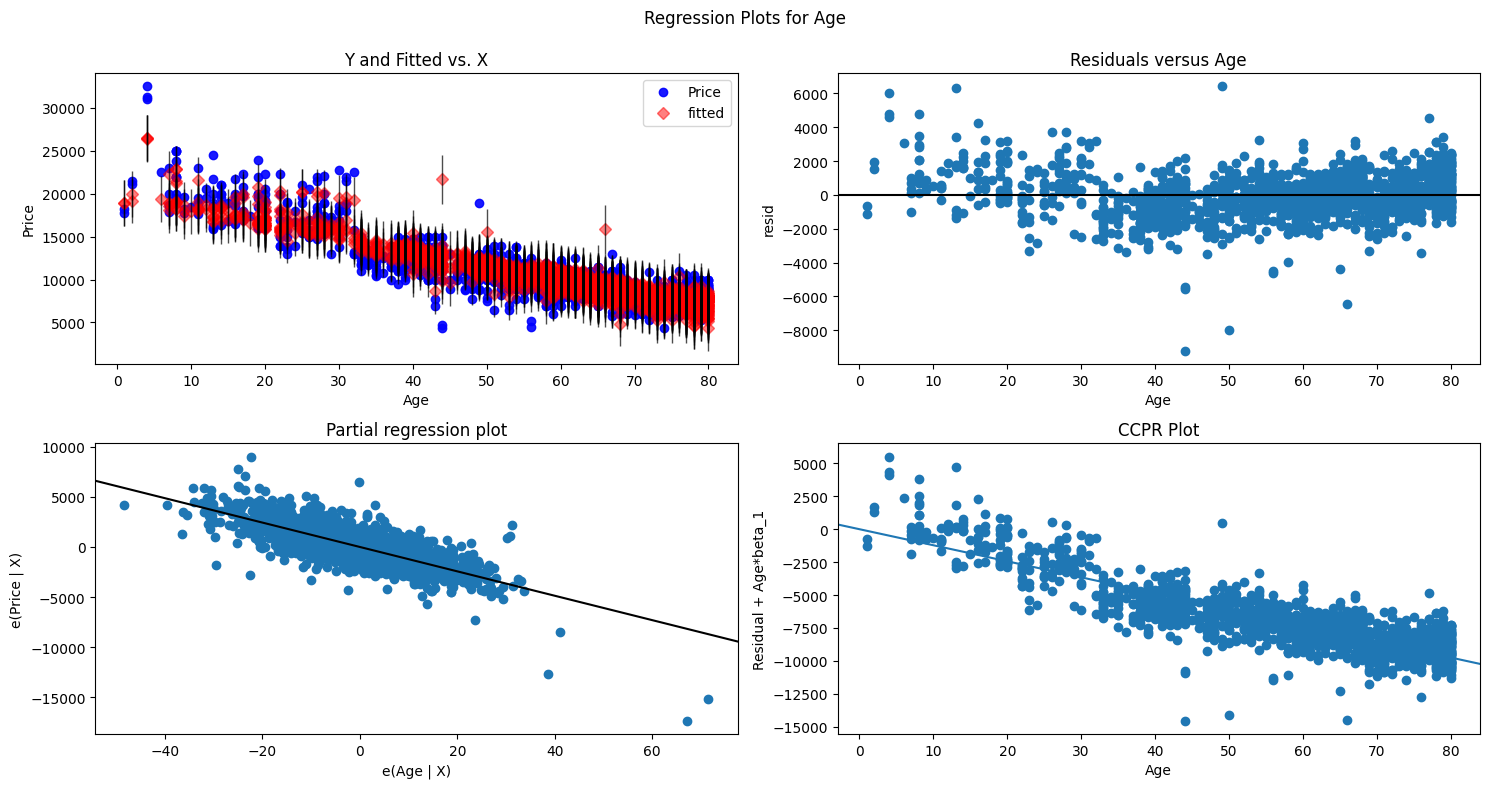

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age", fig=fig)
plt.show()

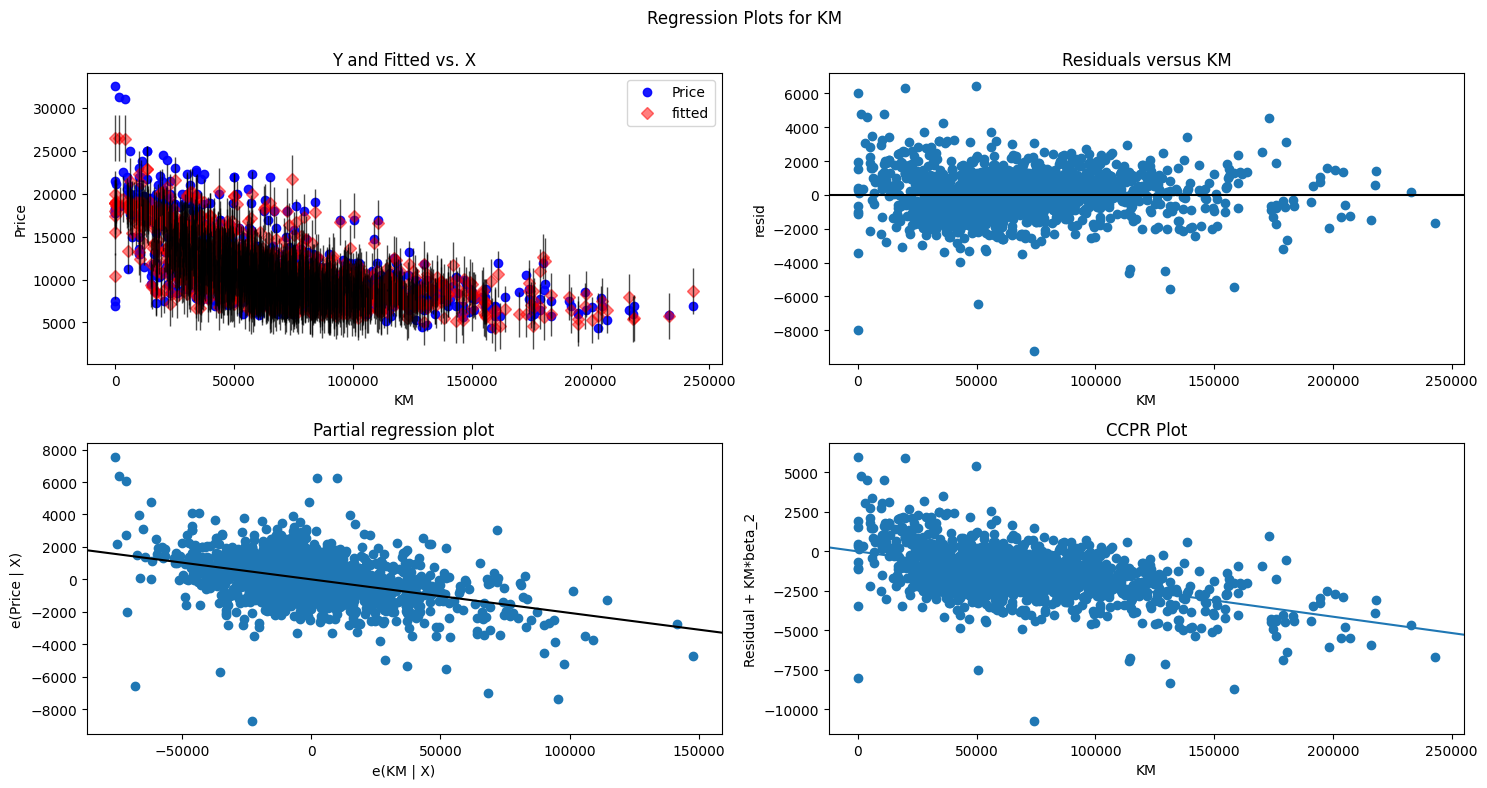

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

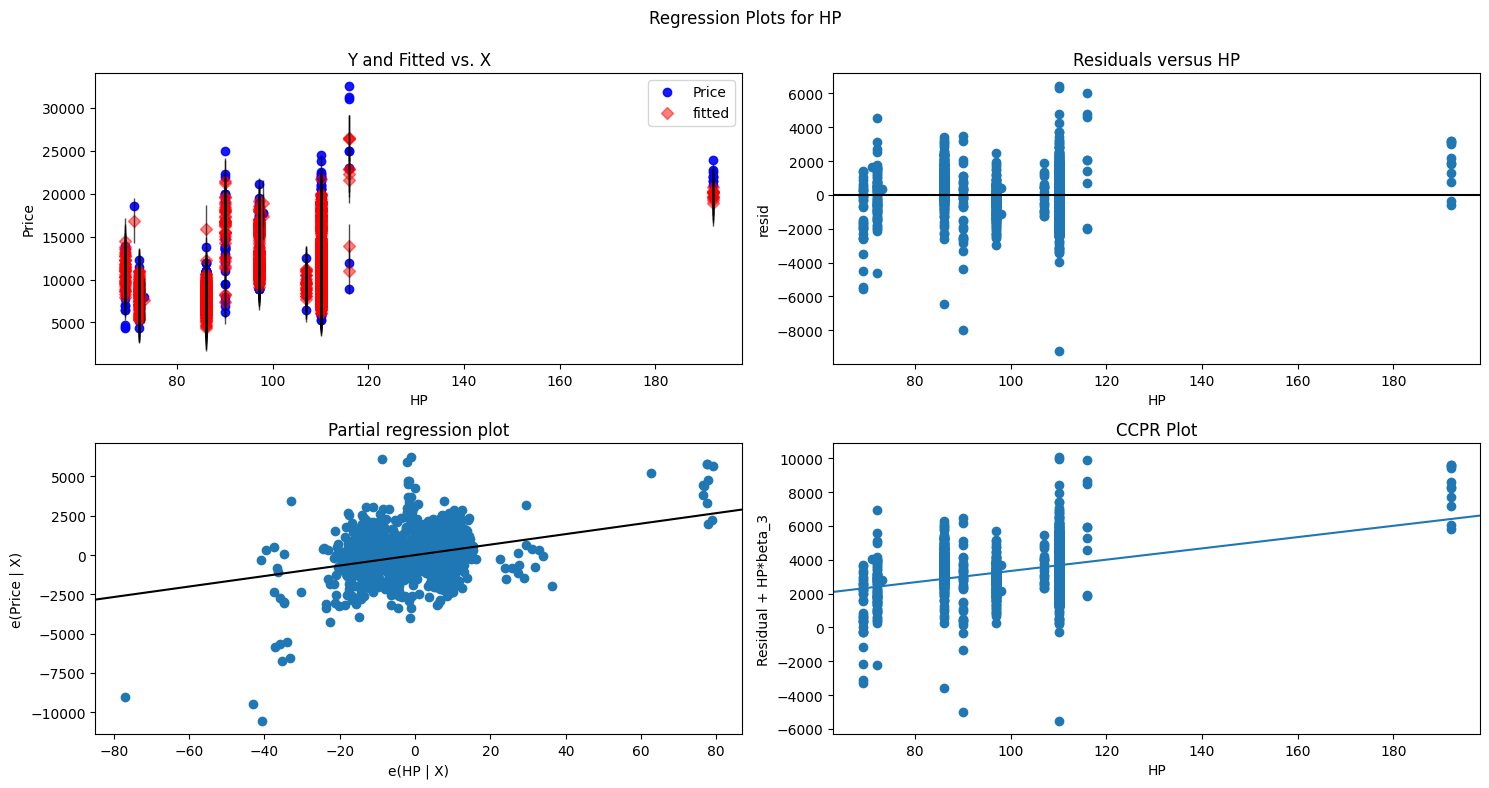

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

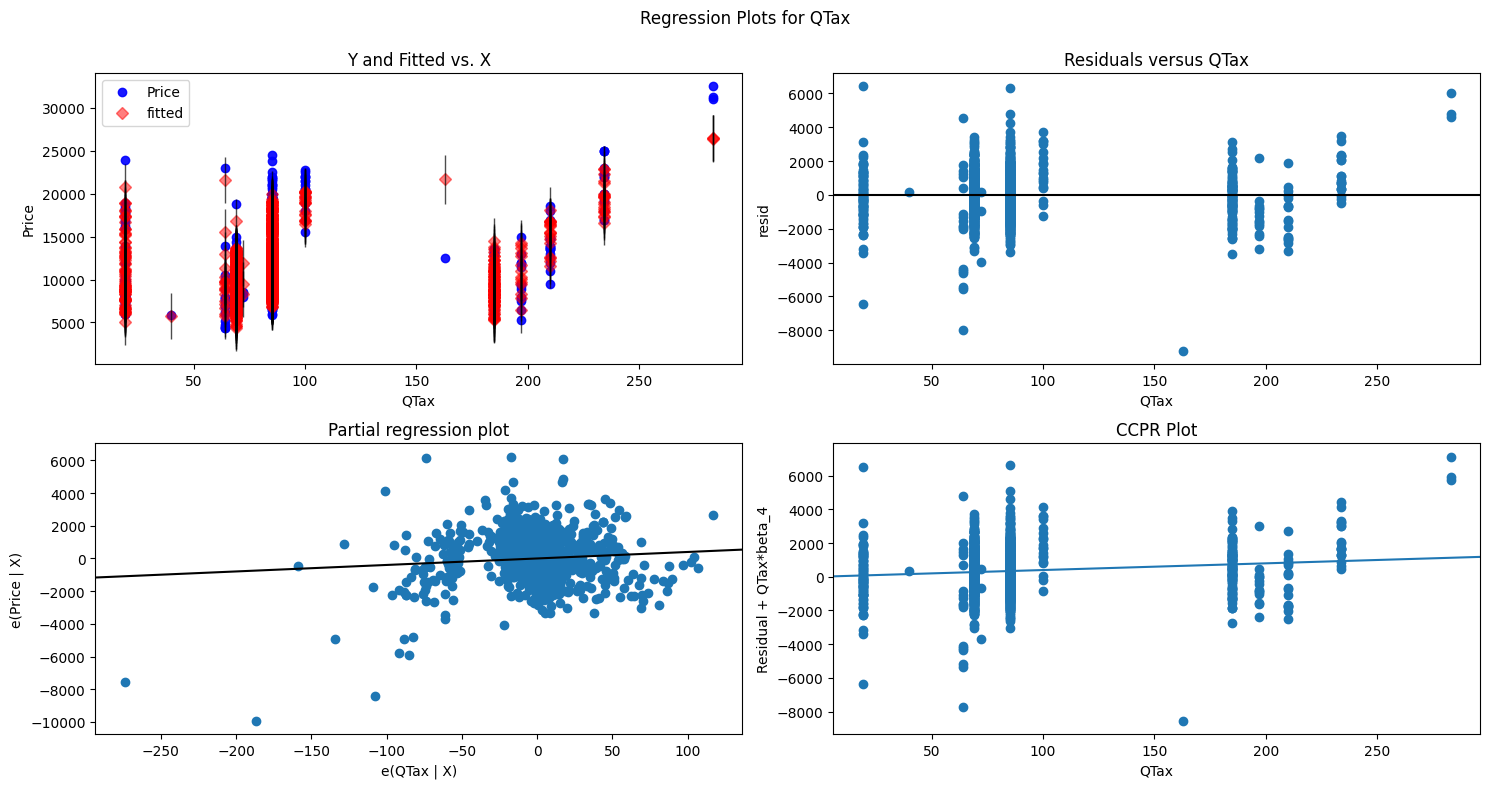

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "QTax", fig=fig)
plt.show()

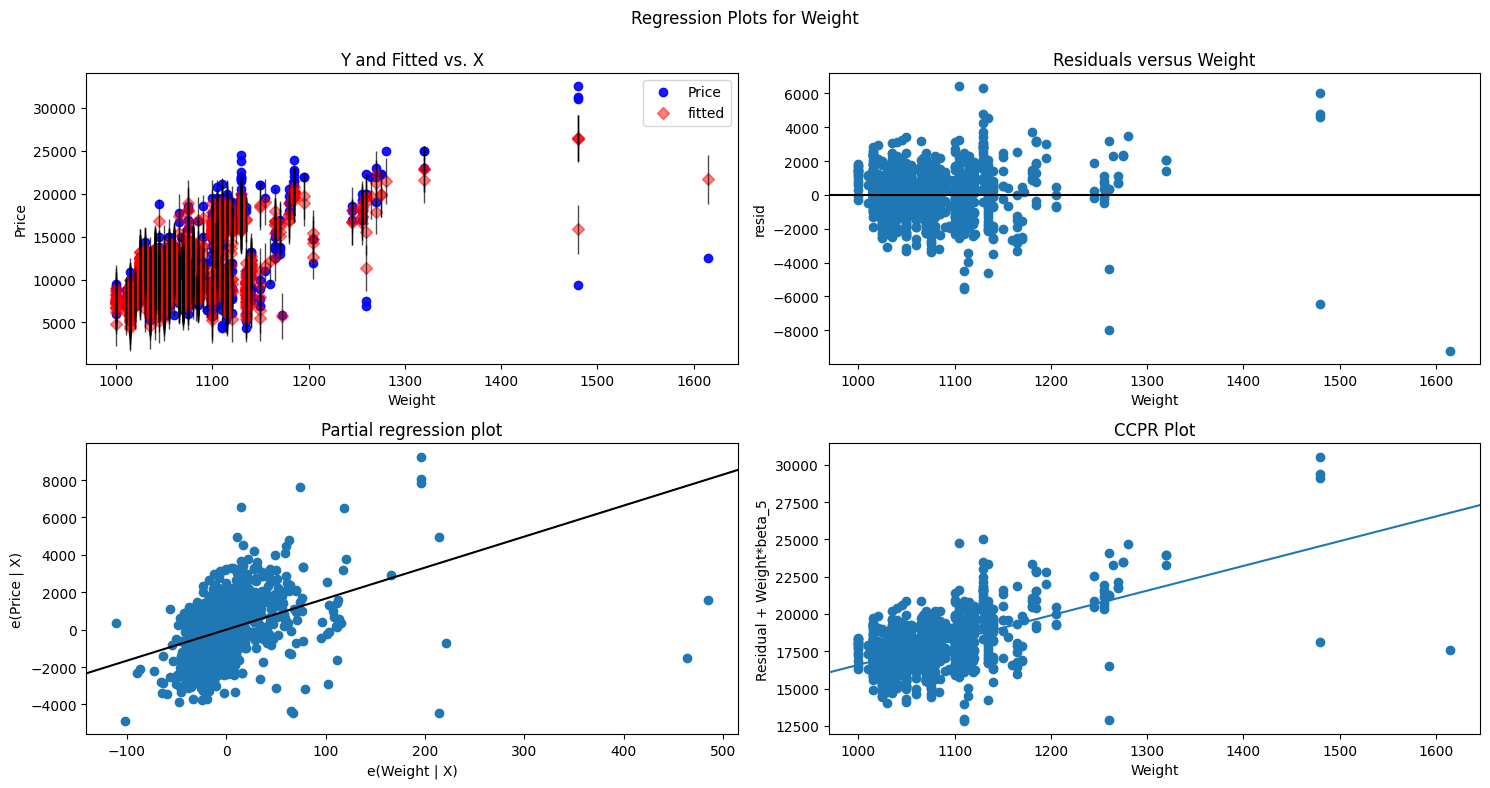

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

In [36]:
model1_influence = model1.get_influence()
(c, _)= model1_influence.cooks_distance

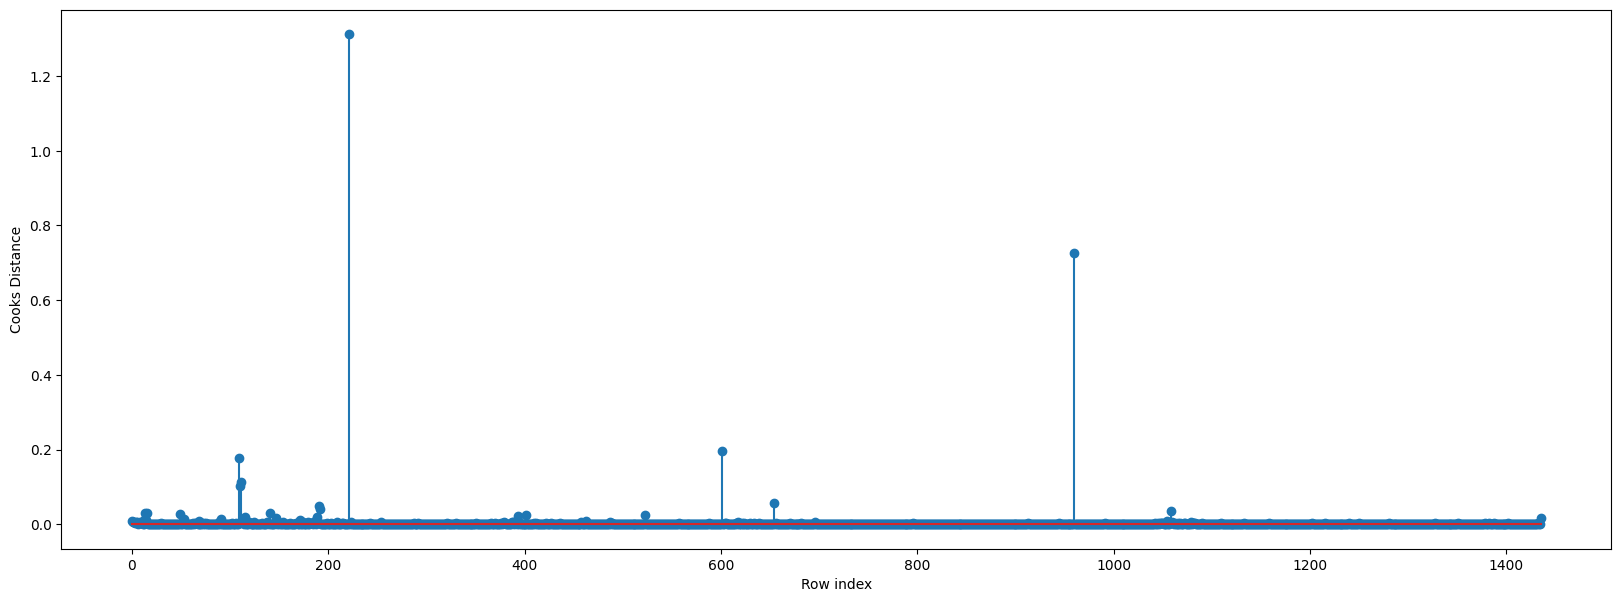

In [37]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
(np.argmax(c), np.max(c))

(221, 1.3115552794479086)

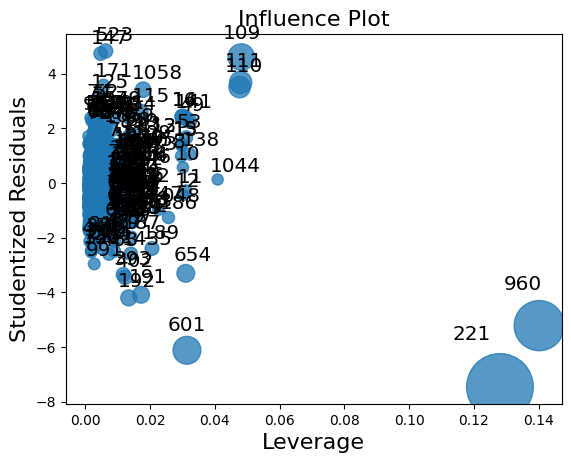

In [39]:
influence_plot(model1)
plt.show()

In [40]:
k = 5
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.01253481894150418

In [41]:
df1[df1.index.isin([221,960])]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [42]:
df2 = df1.drop(['cc','Doors','Gears'], axis = 1)
df2

,Price,Age,KM,HP,QTax,Weight
0,13500,23,46986,90,210,1165
1,13750,23,72937,90,210,1165
2,13950,24,41711,90,210,1165
3,14950,26,48000,90,210,1165
4,13750,30,38500,90,210,1170
...,...,...,...,...,...,...
1431,7500,69,20544,86,69,1025
1432,10845,72,19000,86,69,1015
1433,8500,71,17016,86,69,1015
1434,7250,70,16916,86,69,1015


In [43]:
df3 = df2.drop(df2.index[[221,960]], axis = 0).reset_index()
df3 = df3.drop(['index'], axis = 1)

In [44]:
df3

,Price,Age,KM,HP,QTax,Weight
0,13500,23,46986,90,210,1165
1,13750,23,72937,90,210,1165
2,13950,24,41711,90,210,1165
3,14950,26,48000,90,210,1165
4,13750,30,38500,90,210,1170
...,...,...,...,...,...,...
1429,7500,69,20544,86,69,1025
1430,10845,72,19000,86,69,1015
1431,8500,71,17016,86,69,1015
1432,7250,70,16916,86,69,1015


In [45]:
model2 = smf.ols('Price ~ Age+KM+HP+QTax+Weight', data = df3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1939.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:56:34   Log-Likelihood:                -12317.
No. Observations:                1434   AIC:                         2.465e+04
Df Residuals:                    1428   BIC:                         2.468e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8122.1523   1159.672     -7.004      0.000   -1.04e+04   -5847.309
Age         -116.2867      2.599    -44.736      0.000    -121.386    -111.188
KM            -0.0212      0.001    -17.508      0.000      -0.024      -0.019
HP            28.4174      2.696     10.540      0.000      23.129      33.706
QTax          -0.4499      1.339     -0.336      0.737      -3.077       2.177
Weight        22.3599      1.150     19.447      0.000      20.104      24.615
==============================================================================
Omnibus:                      126.082   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.172
Skew:                          -0.215   Prob(JB):                    6.56e-142
Kurtosis:                       6.270   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
model2_influence = model2.get_influence()
(c1, _)= model2_influence.cooks_distance

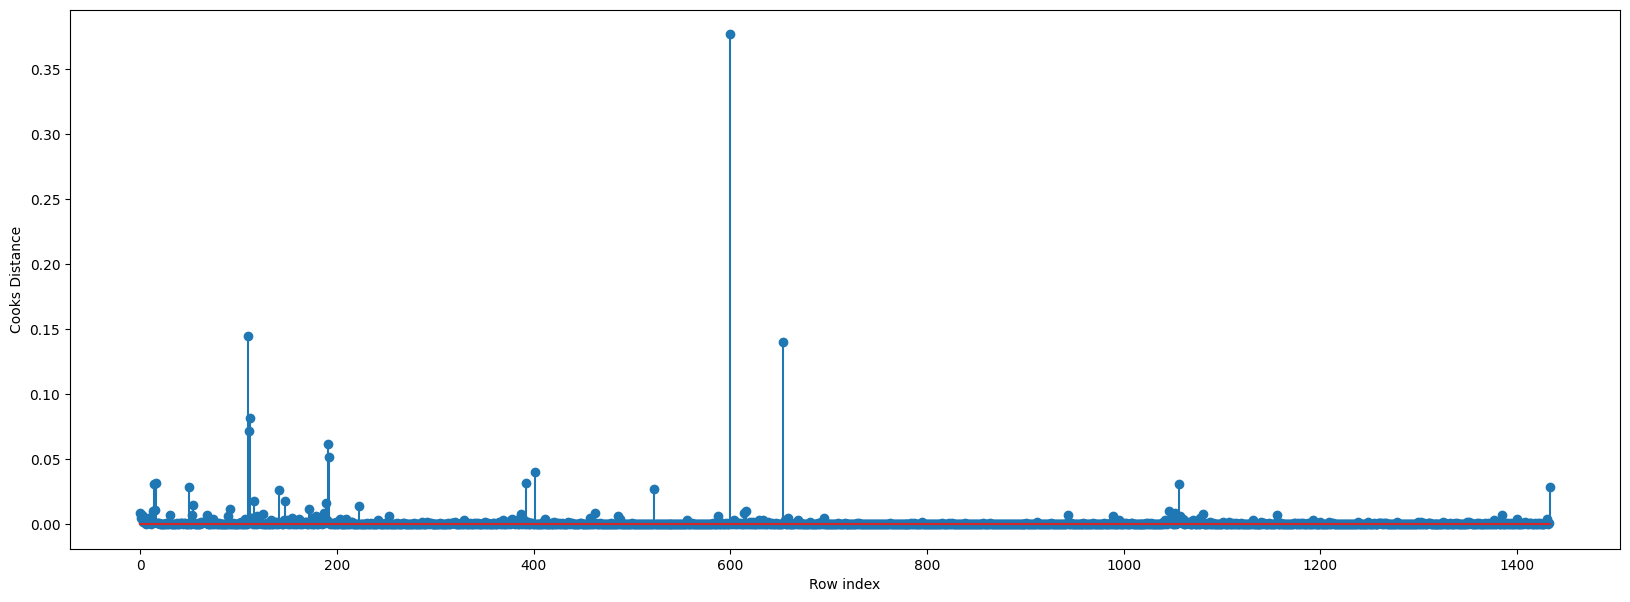

In [47]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [48]:
(np.argmax(c1), np.max(c1))

(600, 0.37712503996353175)

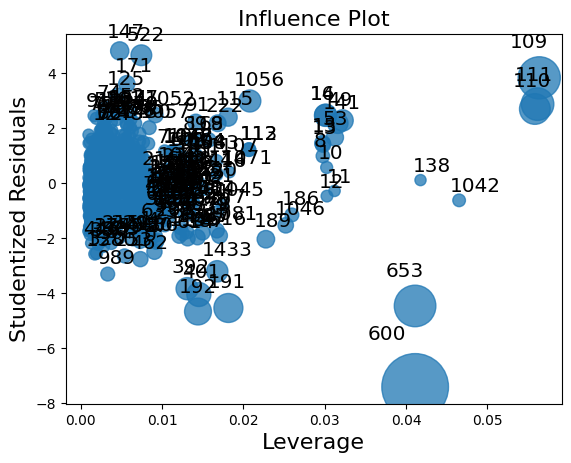

In [49]:
influence_plot(model2)
plt.show()

In [50]:
k = 5
n = df3.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff

0.012552301255230124

In [51]:
df3[df3.index.isin([600])]

,Price,Age,KM,HP,QTax,Weight
600,7500,50,1,90,64,1260


In [52]:
df4 = df3.drop(([600]), axis=0).reset_index()

In [53]:
df4 = df4.drop(['index'], axis=1)

In [54]:
df4

,Price,Age,KM,HP,QTax,Weight
0,13500,23,46986,90,210,1165
1,13750,23,72937,90,210,1165
2,13950,24,41711,90,210,1165
3,14950,26,48000,90,210,1165
4,13750,30,38500,90,210,1170
...,...,...,...,...,...,...
1428,7500,69,20544,86,69,1025
1429,10845,72,19000,86,69,1015
1430,8500,71,17016,86,69,1015
1431,7250,70,16916,86,69,1015


In [55]:
model3 = smf.ols('Price ~ Age+KM+HP+QTax+Weight', data = df4).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     2022.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:56:38   Log-Likelihood:                -12281.
No. Observations:                1433   AIC:                         2.457e+04
Df Residuals:                    1427   BIC:                         2.461e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9589.8610   1155.592     -8.299      0.000   -1.19e+04   -7323.020
Age         -114.4584      2.564    -44.645      0.000    -119.488    -109.429
KM            -0.0218      0.001    -18.303      0.000      -0.024      -0.019
HP            26.3219      2.662      9.888      0.000      21.100      31.544
QTax          -1.7520      1.326     -1.321      0.187      -4.354       0.850
Weight        23.9834      1.150     20.857      0.000      21.728      26.239
==============================================================================
Omnibus:                       65.554   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.487
Skew:                          -0.036   Prob(JB):                     7.23e-47
Kurtosis:                       4.885   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model3_influence = model3.get_influence()
(c2, _) = model3_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

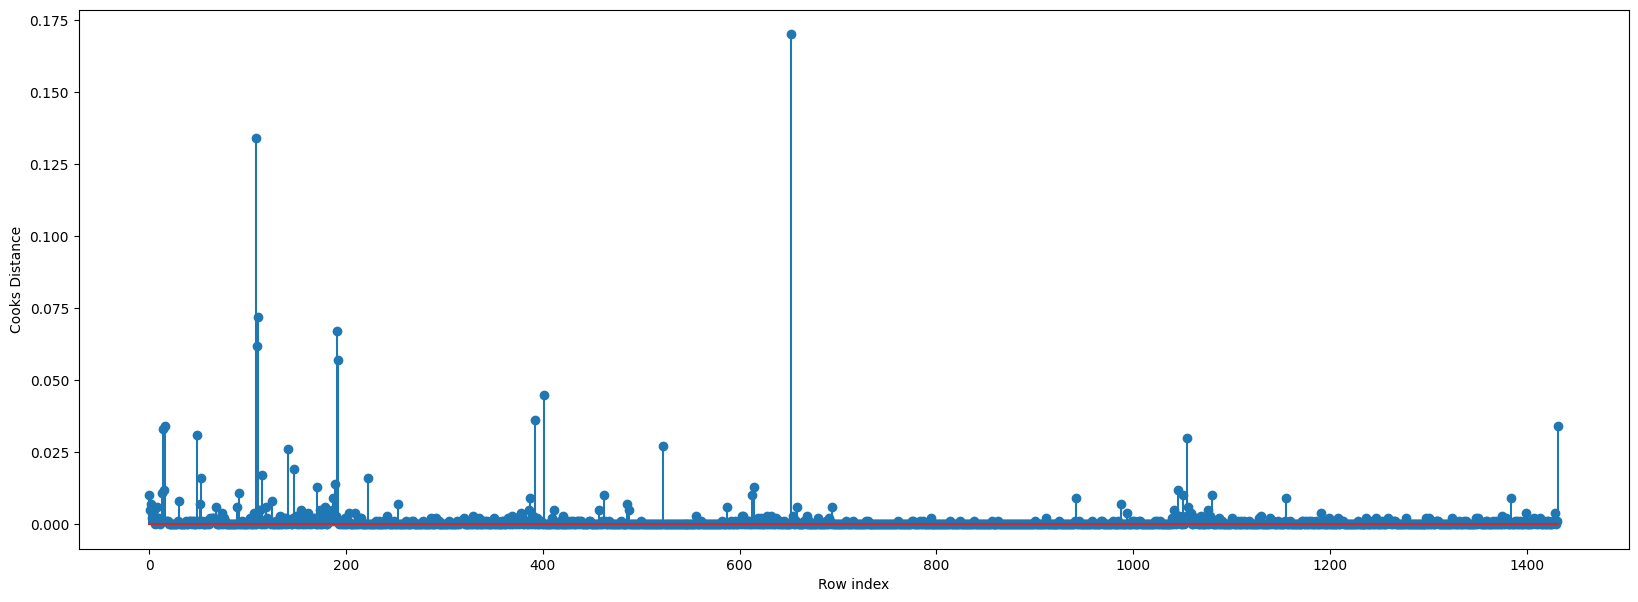

In [57]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c2,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [58]:
(np.argmax(c2), np.max(c2))

(652, 0.17037344842583646)

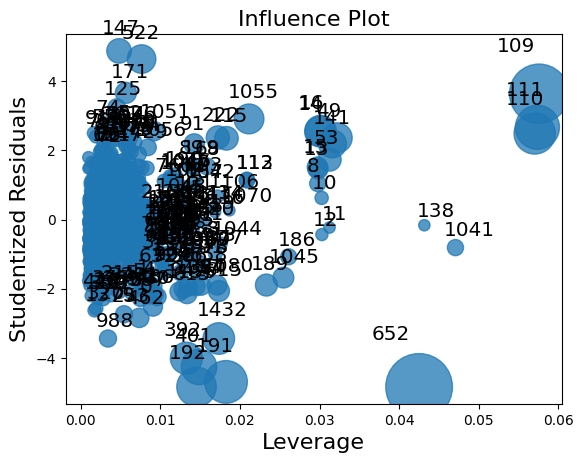

In [59]:
influence_plot(model3)
plt.show()

In [60]:
k = 5
n = df4.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff

0.01256106071179344

In [61]:
df4[df4.index.isin([652])]

,Price,Age,KM,HP,QTax,Weight
652,6950,65,114383,90,64,1260


In [62]:
df5 = df4.drop(([652]), axis=0).reset_index()

In [63]:
df5 = df5.drop(['index'], axis=1)

In [64]:
df5

,Price,Age,KM,HP,QTax,Weight
0,13500,23,46986,90,210,1165
1,13750,23,72937,90,210,1165
2,13950,24,41711,90,210,1165
3,14950,26,48000,90,210,1165
4,13750,30,38500,90,210,1170
...,...,...,...,...,...,...
1427,7500,69,20544,86,69,1025
1428,10845,72,19000,86,69,1015
1429,8500,71,17016,86,69,1015
1430,7250,70,16916,86,69,1015


In [65]:
model4 = smf.ols('Price ~ Age+KM+HP+QTax+Weight', data=df5).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     2056.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:56:41   Log-Likelihood:                -12262.
No. Observations:                1432   AIC:                         2.454e+04
Df Residuals:                    1426   BIC:                         2.457e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.063e+04   1166.807     -9.114      0.000   -1.29e+04   -8345.643
Age         -113.5760      2.550    -44.532      0.000    -118.579    -108.573
KM            -0.0217      0.001    -18.346      0.000      -0.024      -0.019
HP            25.1379      2.653      9.477      0.000      19.935      30.341
QTax          -2.7913      1.333     -2.093      0.037      -5.407      -0.176
Weight        25.1055      1.164     21.562      0.000      22.822      27.390
==============================================================================
Omnibus:                       59.478   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.722
Skew:                          -0.010   Prob(JB):                     5.71e-40
Kurtosis:                       4.740   Cond. No.                     2.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model4_influence = model4.get_influence()
(c3, _) = model4_influence.cooks_distance

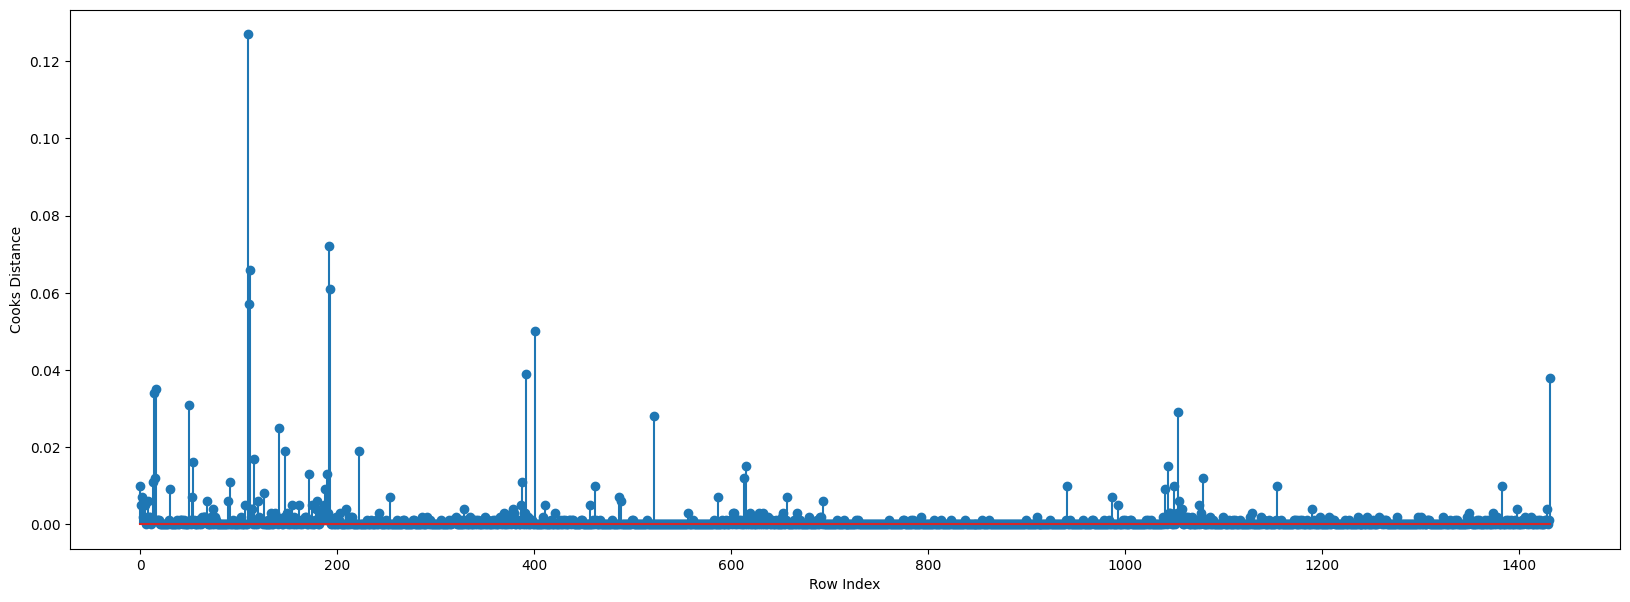

In [67]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c3,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [68]:
(np.argmax(c3),np.max(c3))

(109, 0.12679662029962405)

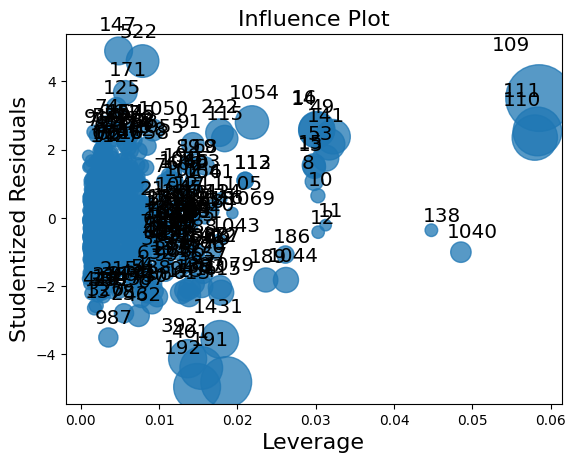

In [69]:
influence_plot(model4)
plt.show()

In [70]:
df5[df5.index.isin([109])]

,Price,Age,KM,HP,QTax,Weight
109,32500,4,1,116,283,1480


In [71]:
df6 = df5.drop([109],axis=0).reset_index()

In [72]:
df6 = df6.drop(['index'], axis= 1)

In [73]:
df6

,Price,Age,KM,HP,QTax,Weight
0,13500,23,46986,90,210,1165
1,13750,23,72937,90,210,1165
2,13950,24,41711,90,210,1165
3,14950,26,48000,90,210,1165
4,13750,30,38500,90,210,1170
...,...,...,...,...,...,...
1426,7500,69,20544,86,69,1025
1427,10845,72,19000,86,69,1015
1428,8500,71,17016,86,69,1015
1429,7250,70,16916,86,69,1015


In [74]:
model5 = smf.ols('Price ~ Age+KM+HP+QTax+Weight', data = df6).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     2016.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:56:43   Log-Likelihood:                -12248.
No. Observations:                1431   AIC:                         2.451e+04
Df Residuals:                    1425   BIC:                         2.454e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9843.6992   1183.810     -8.315      0.000   -1.22e+04   -7521.502
Age         -114.3469      2.550    -44.845      0.000    -119.349    -109.345
KM            -0.0214      0.001    -18.090      0.000      -0.024      -0.019
HP            25.3999      2.643      9.610      0.000      20.215      30.585
QTax          -2.6774      1.329     -2.015      0.044      -5.284      -0.071
Weight        24.3501      1.180     20.644      0.000      22.036      26.664
==============================================================================
Omnibus:                       59.260   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.699
Skew:                          -0.008   Prob(JB):                     9.52e-40
Kurtosis:                       4.736   Cond. No.                     2.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
model5_influence = model5.get_influence()
(c4, _) = model5_influence.cooks_distance

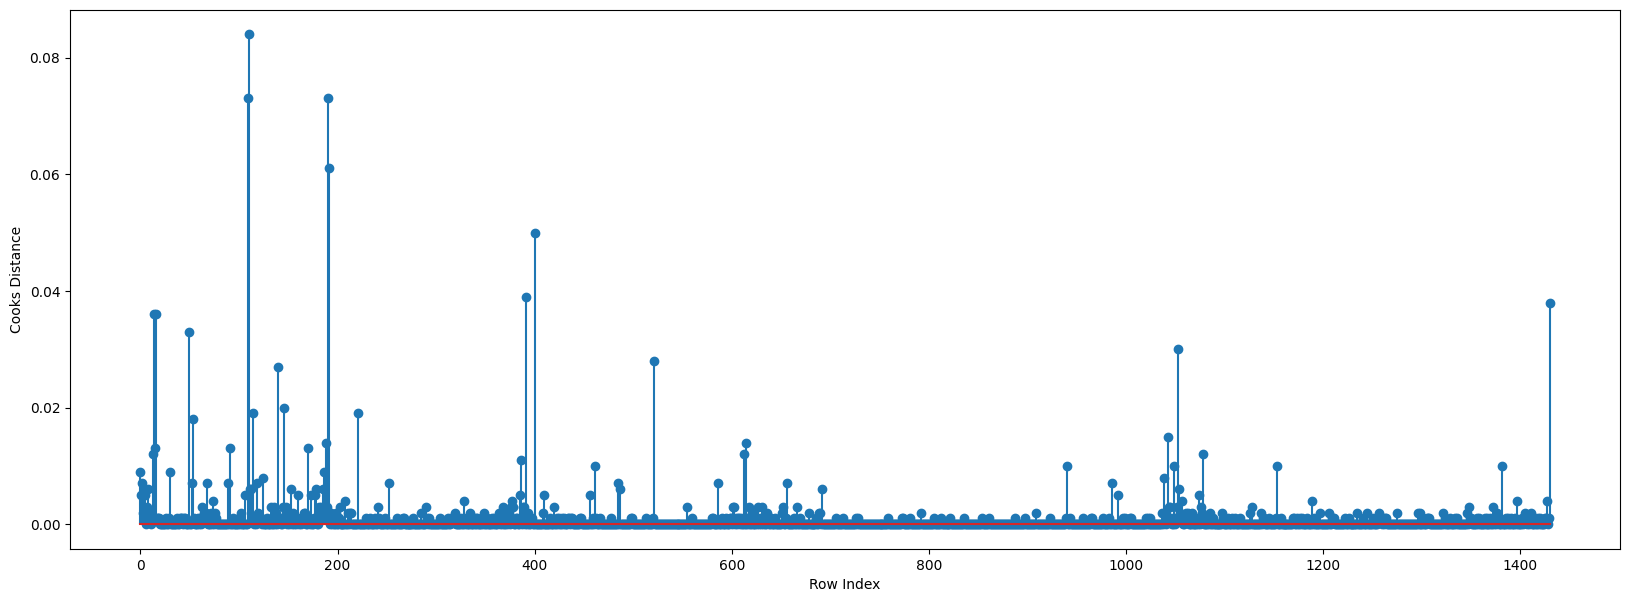

In [76]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c4,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [77]:
(np.argmax(c4), np.max(c4))

(110, 0.08399536998978192)

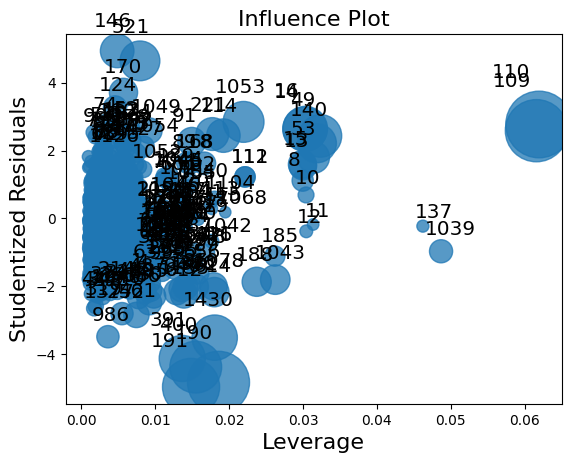

In [78]:
influence_plot(model5)
plt.show()

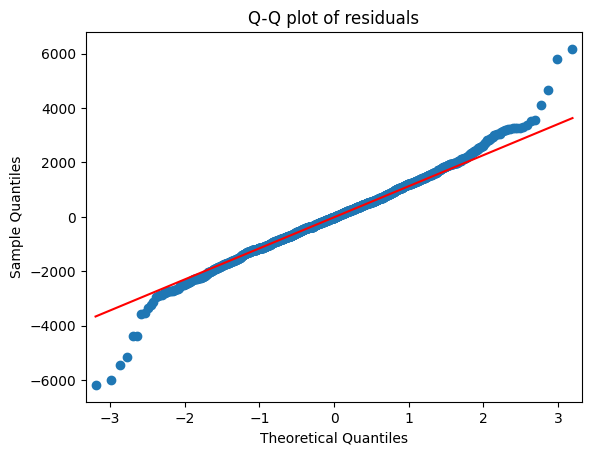

In [79]:
sm.qqplot(model5.resid, line='q')
plt.title('Q-Q plot of residuals')
plt.show()

In [80]:
predicted = model5.fittedvalues

In [81]:
errors = model5.resid

In [82]:
df6['Predicted'] = predicted
df6['Errors'] = errors
df6

,Price,Age,KM,HP,QTax,Weight,Predicted,Errors
0,13500,23,46986,90,210,1165,16614.508618,-3114.508618
1,13750,23,72937,90,210,1165,16060.333521,-2310.333521
2,13950,24,41711,90,210,1165,16612.807624,-2662.807624
3,14950,26,48000,90,210,1165,16249.814314,-1299.814314
4,13750,30,38500,90,210,1170,16117.046454,-2367.046454
...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,69,1025,8786.116621,-1286.116621
1427,10845,72,19000,86,69,1015,8232.546946,2612.453054
1428,8500,71,17016,86,69,1015,8389.261504,110.738496
1429,7250,70,16916,86,69,1015,8505.743860,-1255.743860
